# Lending Club Case Study

## Steps


- Step 1: Define the Problem and Set Objectives
- Step 2: Load the Data and basic investigation
- Step 3: Data Understanding
- Step 4: Data Cleaning
- Step 5: Handling Outliers and missing values
- Step 6: Feature Engineering
- Step 7: Univariate Analysis
- Step 8: Bivariate Analysis
- Step 9: Identify Important Driver Variables
- Step 10: Summarize Insights and Recommendations
- Step 11: Presentation and Documentation


### Step 1: Define the Problem and Set Objectives.
1. **Objective**: Identify patterns in loan applicants that lead to loan defaults using Exploratory Data Analysis (EDA). This will help the company minimize risk by identifying high-risk loan applicants.
2. **Business Problem**: The company faces two risks when deciding on a loan:
    - If a reliable applicant is rejected, the company loses potential business.
    - If a risky applicant is accepted, the company risks financial loss due to defaults.
3. **Data Overview**: The provided loan dataset contains historical data on loans issued between 2007 and 2011, detailing whether the applicant defaulted or repaid the loan.


### Step 2: Load the Data and basic investigation


In [20]:
import pandas as pd

In [21]:
import warnings
warnings.filterwarnings('ignore')

#### 2.1 Load the Dataset

In [22]:
loan_data = pd.read_csv("loan.csv")

#### 2.2 Check Dataset Overview

In [23]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [24]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [25]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### Observations from the Data Loading:
1. **Data Structure**:
   - The dataset contains 39,717 rows and 111 columns.
   - Data types include `float64` (74 columns), `int64` (13 columns), and `object` (24 columns).


2. **Missing Data**:
    - Several columns have missing values, as shown by the `count` in the summary statistics.
    - Some columns like `num_tl_op_past_12m`, `pct_tl_nvr_dlq`, and `percent_bc_gt_75` have no valid data at all.
    - Columns with extensive missing values might be dropped or imputed, depending on their relevance.

3. **Key Numerical Statistics**:
    - For columns like `loan_amnt`, `annual_inc`, and `installment`, the summary statistics provide insights into their distributions (e.g., the mean loan amount is approximately 9,234, with a maximum of 35,000).
  
      
4. **Potential Data Quality Issues**:
    - Some columns (like `int_rate`) are stored as strings and may require cleaning before analysis (e.g., converting percentages to numerical values).

### Step 3: Data Understanding

#### 3.1 Inspect Column Types and Missing Values
- Identify which columns have missing data and which need data type conversions (e.g., percentages or categorical data).

In [26]:
# Check for missing values across the dataset
missing_data = loan_data.isnull().sum().sort_values(ascending=False)

In [27]:
missing_data.head(20)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
bc_open_to_buy               39717
avg_cur_bal                  39717
acc_open_past_24mths         39717
inq_last_12m                 39717
total_cu_tl                  39717
inq_fi                       39717
total_rev_hi_lim             39717
all_util                     39717
max_bal_bc                   39717
open_rv_24m                  39717
open_rv_12m                  39717
il_util                      39717
total_bal_il                 39717
mths_since_rcnt_il           39717
open_il_24m                  39717
dtype: int64

In [28]:
missing_data.info()

<class 'pandas.core.series.Series'>
Index: 111 entries, verification_status_joint to id
Series name: None
Non-Null Count  Dtype
--------------  -----
111 non-null    int64
dtypes: int64(1)
memory usage: 1.7+ KB


- Several columns have extensive missing values. For example, columns like `verification_status_joint`, `annual_inc_joint`, and `mo_sin_old_rev_tl_op` have no valid data in the dataset (all values are missing).
- These columns may need to be removed or further explored to decide if they are relevant for analysis.

#### 3.2 Data Types(Numerical vs Categorical Columns)



In [29]:
numerical_cols = loan_data.select_dtypes(include=['float64', 'int64']).columns

In [30]:
numerical_cols

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
    

In [31]:
len(numerical_cols)

87

In [32]:
categorical_cols = loan_data.select_dtypes(include=['object']).columns

In [33]:
categorical_cols

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [34]:
len(categorical_cols)

24

- There are 87 numerical columns and 24 categorical columns.
- The numerical columns include key features like `loan_amnt`, `funded_amnt`, `annual_inc`, and `total_pymnt`.
- The categorical columns include `term`, `int_rate`, `grade`, `loan_status`, and `home_ownership`, which will be critical for segmenting the data.

#### Key Columns:

- Loan Amount:

In [35]:
loan_amnt_stats = loan_data['loan_amnt'].describe() 
loan_amnt_stats

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

    - The loan amounts range from 500 to 35,000.
    - The average loan amount is around 11,219, with a median of 10,000.

- Interest Rates:

In [36]:
int_rate_unique = loan_data['int_rate'].unique()
int_rate_unique

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

    - Interest rates are stored as percentages (e.g., '10.65%', '15.27%'). These will need to be converted to numeric for analysis.

- Loan Status:

In [37]:
loan_status_counts = loan_data['loan_status'].value_counts()
loan_status_counts

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

    - Most loans in the dataset are classified as Fully Paid (32,950), while 5,627 loans were Charged Off (defaults), and 1,140 are still Current.
    - This indicates the dataset is imbalanced, with a majority of loans being fully paid or the company approved right customers.

- Loan Grades:

In [38]:
grade_counts = loan_data['grade'].value_counts()
grade_counts

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

    - Loans are assigned grades from A to G. Most loans fall into the B and A categories, while fewer loans are assigned lower grades like F and G.
    - Loan grades will likely be a significant factor in determining default risk.

##### There are several other key columns that could provide valuable insights into loan defaults

- `dti` (Debt-to-Income Ratio):
    - This represents the ratio of the borrower's monthly debt payments to their monthly income. A high DTI ratio might be an indicator of a higher risk of default.
- `annual_inc` (Annual Income):
    - Understanding how a borrower’s income impacts their ability to repay loans could provide insights into default risk.
- `emp_length` (Employment Length):
    - Longer employment may suggest a more stable financial situation, reducing the likelihood of default.
- `home_ownership`:
    - The type of home ownership (e.g., Rent, Mortgage, Own) may influence the borrower’s financial stability.
- `purpose`:
    - The purpose of the loan (e.g., debt consolidation, credit card, home improvement) may affect default risk. Loans for riskier purposes like debt consolidation might have higher default rates.
- `revol_util` (Revolving Line Utilization Rate):
    - This measures the borrower’s credit card utilization rate. Higher utilization may indicate higher financial stress, increasing default risk.
- `earliest_cr_line` (Earliest Credit Line):
    - This represents the date the borrower’s oldest credit line was opened. A longer credit history may indicate better creditworthiness.
- `installment`:
    - This is the monthly payment amount. Higher monthly installments relative to income could increase the risk of default.
- `delinq_2yrs`:
    - The number of times the borrower has been delinquent in the past two years. A history of delinquencies could be a strong predictor of default.


### Step 4: Data Cleaning

#### 4.1 Handle Missing Data:
- We can either drop columns with excessive missing data or impute values where appropriate (e.g., filling missing values with mean/median).
- Drop columns that have no meaningful data and handle those with some missing values by imputation.

In [39]:
# Drop columns with excessive missing values
# We can set a threshold for how many missing values to tolerate (e.g., drop columns with over 50% missing)
loan_data_clean1 = loan_data.dropna(thresh=len(loan_data) * 0.5, axis=1)
loan_data_clean1.shape, loan_data.shape

((39717, 54), (39717, 111))

In [40]:
number_of_droped_columns_4_1_1 = loan_data.shape[1] - loan_data_clean1.shape[1]
number_of_droped_columns_4_1_1

57

In [41]:
loan_data_clean2 = loan_data_clean1.drop(columns=['id', 'member_id', 'url', 'desc'])
loan_data_clean2.shape, loan_data_clean1.shape

((39717, 50), (39717, 54))

In [42]:
number_of_droped_columns_4_1_2 = loan_data_clean1.shape[1] - loan_data_clean2.shape[1]
number_of_droped_columns_4_1_2

4

In [43]:
loan_data_clean = loan_data_clean2

In [44]:
numeric_cols = loan_data_clean.select_dtypes(include=['float64', 'int64']).columns
loan_data_clean[numeric_cols] = loan_data_clean[numeric_cols].fillna(loan_data_clean[numeric_cols].median())


In [45]:
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

#### 4.2 Missing Data:
- Remaining columns with missing data:
    - emp_title
    - emp_length
    - title
    - revol_util
    - last_pymnt_d
    - last_credit_pull_d

<br />
These columns should be further reviewed to decide on imputations or removals, depending on their relevance.


#### 4.3 Data Type Conversions:

In [46]:
loan_data_clean['int_rate'] = loan_data_clean['int_rate'].str.replace('%', '').astype(float)

In [47]:
loan_data_clean['term'] = loan_data_clean['term'].apply(lambda x: int(x.split()[0]))

In [48]:
loan_data_clean['grade'] = loan_data_clean['grade'].astype('category')

In [49]:
loan_data_clean['loan_status'] = loan_data_clean['loan_status'].astype('category')

- The `int_rate` column was successfully converted from a string to a float.
- Columns like `term`, `grade`, and `loan_status` were converted to appropriate types (integer or category).

In [50]:
cleaned_data_info = loan_data_clean.info()
cleaned_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   39717 non-null  int64   
 1   funded_amnt                 39717 non-null  int64   
 2   funded_amnt_inv             39717 non-null  float64 
 3   term                        39717 non-null  int64   
 4   int_rate                    39717 non-null  float64 
 5   installment                 39717 non-null  float64 
 6   grade                       39717 non-null  category
 7   sub_grade                   39717 non-null  object  
 8   emp_title                   37258 non-null  object  
 9   emp_length                  38642 non-null  object  
 10  home_ownership              39717 non-null  object  
 11  annual_inc                  39717 non-null  float64 
 12  verification_status         39717 non-null  object  
 13  issue_d         

In [51]:
remaining_missing = loan_data_clean.isnull().sum().sort_values(ascending=False)
remaining_missing.head(10)

emp_title              2459
emp_length             1075
last_pymnt_d             71
revol_util               50
title                    11
last_credit_pull_d        2
recoveries                0
initial_list_status       0
out_prncp                 0
out_prncp_inv             0
dtype: int64

In [52]:
loan_data_clean = loan_data_clean.drop(columns=['emp_title', 'emp_length'])

In [53]:
remaining_missing = loan_data_clean.isnull().sum().sort_values(ascending=False)
remaining_missing.head(10)

last_pymnt_d           71
revol_util             50
title                  11
last_credit_pull_d      2
loan_amnt               0
total_rec_late_fee      0
initial_list_status     0
out_prncp               0
out_prncp_inv           0
total_pymnt             0
dtype: int64

### Step 5: Handling Outliers

Using visualization techniques like box plots and histograms to spot outliers in key numeric columns such as loan_amnt, int_rate, annual_inc, and dti

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

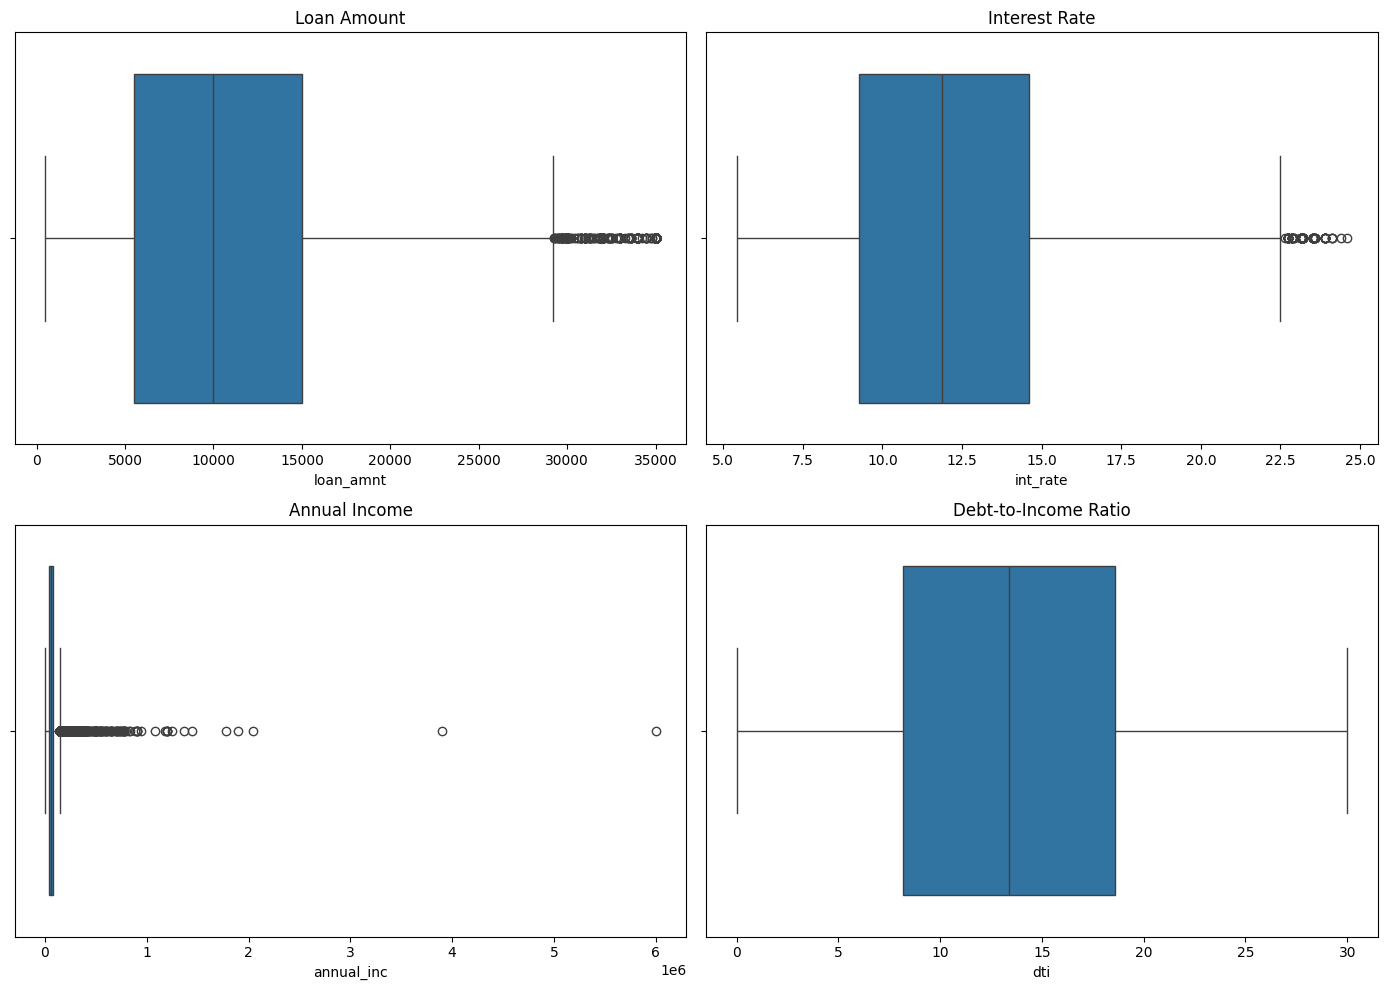

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loan Amount
sns.boxplot(x=loan_data_clean['loan_amnt'], ax=axes[0, 0])
axes[0, 0].set_title('Loan Amount')

# Interest Rate
sns.boxplot(x=loan_data_clean['int_rate'], ax=axes[0, 1])
axes[0, 1].set_title('Interest Rate')

# Annual Income
sns.boxplot(x=loan_data_clean['annual_inc'], ax=axes[1, 0])
axes[1, 0].set_title('Annual Income')

# Debt-to-Income Ratio
sns.boxplot(x=loan_data_clean['dti'], ax=axes[1, 1])
axes[1, 1].set_title('Debt-to-Income Ratio')


plt.tight_layout()
plt.show()


In [58]:
numeric_cols = loan_data_clean.select_dtypes(include=['float64', 'int64']).columns

Q1 = loan_data_clean[numeric_cols].quantile(0.25)
Q3 = loan_data_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

loan_amnt                      9500.00000
funded_amnt                    9600.00000
funded_amnt_inv                9400.00000
term                             24.00000
int_rate                          5.34000
installment                     263.76000
annual_inc                    41896.00000
dti                              10.43000
delinq_2yrs                       0.00000
inq_last_6mths                    1.00000
open_acc                          6.00000
pub_rec                           0.00000
revol_bal                     13355.00000
total_acc                        16.00000
out_prncp                         0.00000
out_prncp_inv                     0.00000
total_pymnt                   10957.50304
total_pymnt_inv               10686.50000
total_rec_prncp                9053.26000
total_rec_int                  2171.22000
total_rec_late_fee                0.00000
recoveries                        0.00000
collection_recovery_fee           0.00000
last_pymnt_amnt                307

 Remove extreme outliers (values outside of 1.5 * IQR range).

In [59]:
loan_data_clean = loan_data_clean[
    ~(
        (loan_data_clean[numeric_cols] < (Q1 - 1.5 * IQR)) |
        (loan_data_clean[numeric_cols] > (Q3 + 1.5 * IQR))
    ).any(axis=1)
]
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19264 entries, 0 to 39714
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   loan_amnt                   19264 non-null  int64   
 1   funded_amnt                 19264 non-null  int64   
 2   funded_amnt_inv             19264 non-null  float64 
 3   term                        19264 non-null  int64   
 4   int_rate                    19264 non-null  float64 
 5   installment                 19264 non-null  float64 
 6   grade                       19264 non-null  category
 7   sub_grade                   19264 non-null  object  
 8   home_ownership              19264 non-null  object  
 9   annual_inc                  19264 non-null  float64 
 10  verification_status         19264 non-null  object  
 11  issue_d                     19264 non-null  object  
 12  loan_status                 19264 non-null  category
 13  pymnt_plan           

Handleing remaining missing values

In [60]:
remaining_missing = loan_data_clean.isnull().sum().sort_values(ascending=False)
remaining_missing.head(10)

revol_util             26
last_pymnt_d            9
title                   6
last_credit_pull_d      1
loan_amnt               0
total_rec_late_fee      0
initial_list_status     0
out_prncp               0
out_prncp_inv           0
total_pymnt             0
dtype: int64

In [61]:
# For categorical columns (object types), fill missing values with the mode
categorical_cols = loan_data_clean.select_dtypes(include=['object', 'category']).columns
loan_data_clean[categorical_cols] = loan_data_clean[categorical_cols].fillna(loan_data_clean[categorical_cols].mode().iloc[0])


In [62]:
remaining_missing = loan_data_clean.isnull().sum().sort_values(ascending=False)
remaining_missing.head(10)

loan_amnt              0
funded_amnt            0
total_acc              0
initial_list_status    0
out_prncp              0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
dtype: int64

In [42]:
# For numeric columns (float64 and int64 types), fill missing values with the median
# numeric_cols = loan_data_clean.select_dtypes(include=['float64', 'int64']).columns
# loan_data_clean[numeric_cols] = loan_data_clean[numeric_cols].fillna(loan_data_clean[numeric_cols].median())


# Step 6: Feature Engineering
After reviewing the data, it was confirmed that all necessary derived features were already present. These include Debt-to-Income Ratio (dti), Loan Term, and Credit History. Thus, no additional feature engineering was required. The focus will now shift to Exploratory Data Analysis (EDA) to extract meaningful insights from the data.
1. Debt-to-Income Ratio (dti):
    - This feature, which calculates the borrower’s monthly debt payments as a percentage of their monthly income, is already included in the dataset. It’s a crucial factor in assessing the borrower’s financial risk.
  
      
2. Loan-to-Income Ratio:

    - The loan amount relative to the borrower’s income provides a measure of how much debt the borrower is taking on compared to their financial capacity. This metric helps in understanding the borrower’s risk level.
      
3. Loan Term in Years (term):

    - The dataset already contains the loan term, which is expressed in months (36 or 60). This can easily be interpreted for the analysis.
  
      
4. Credit History (earliest_cr_line):

   - This field provides the borrower’s earliest credit line date, which can be used to estimate the borrower’s credit history length and assess their creditworthiness over time.
  

5. Interest Rate (int_rate):

   - The interest rate on the loan is a key factor that reflects the perceived risk associated with the borrower. Higher rates usually indicate higher perceived risk.

# Step 7: Exploratory Data Analysis (EDA) 

## 7.1: Univariate Analysis - Loan Amount (`loan_amnt`)

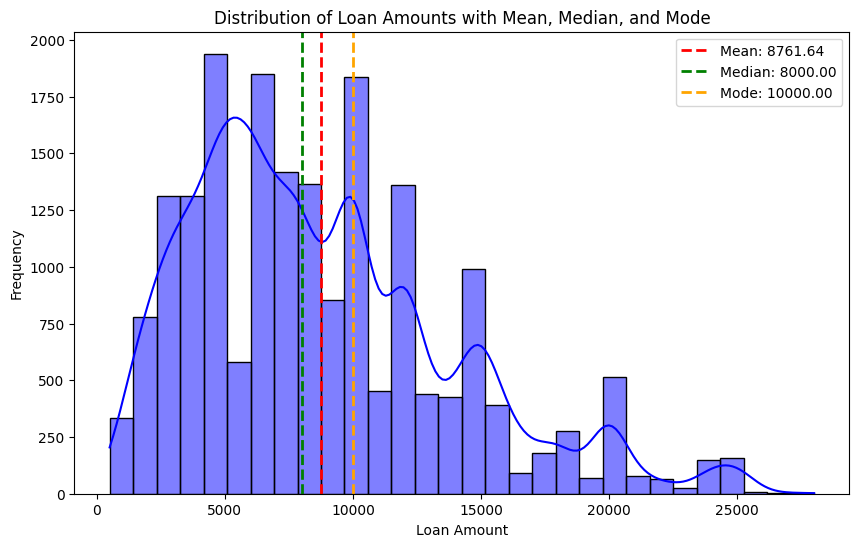

In [63]:
# Calculate mean, median, and mode
mean_loan_amnt = loan_data_clean['loan_amnt'].mean()
median_loan_amnt = loan_data_clean['loan_amnt'].median()
mode_loan_amnt = loan_data_clean['loan_amnt'].mode()[0]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_clean['loan_amnt'], bins=30, kde=True, color='blue')

# Add mean, median, and mode lines
plt.axvline(mean_loan_amnt, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_loan_amnt:.2f}')
plt.axvline(median_loan_amnt, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_loan_amnt:.2f}')
plt.axvline(mode_loan_amnt, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_loan_amnt:.2f}')

# Add titles and labels
plt.title('Distribution of Loan Amounts with Mean, Median, and Mode')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [64]:
# Summary statistics for Loan Amount
loan_amnt_stats = loan_data_clean['loan_amnt'].describe()
loan_amnt_stats

count    19264.000000
mean      8761.635694
std       5142.220068
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
max      28000.000000
Name: loan_amnt, dtype: float64

The loan amount is a crucial variable for the analysis. The histogram shows the distribution of loan amounts across the dataset.

### 7.1.1 Key Observations:
- The loan amounts range between 500 and 35,000.
- The most common loan amounts appear to be clustered around 10,000.
- The average loan amount is approximately 12,000, with a median of 10,000. This indicates that most borrowers request moderate loan amounts.
- There is a slight tail towards the higher loan amounts, suggesting some borrowers take out larger loans, though they are less frequent.
- The distribution is right-skewed, meaning that while most loans are for smaller amounts, there is a significant portion of larger loan amounts that pull the mean higher than the median.


### 7.1.2 Chart Insight:
- The histogram provides a clear view of how loan amounts are distributed, with a visible peak around 10,000, indicating a majority of loans fall in this range.

### 7.1.3 Skewness Analysis:
- Right skewness occurs because most borrowers take out smaller loans, but there are some larger loans (up to $28,000) that stretch the distribution.
- The mean being higher than the median supports the presence of right skewness, as larger loan amounts affect the average more than the median.

##  7.2: Univariate Analysis - Interest Rate (`int_rate`)

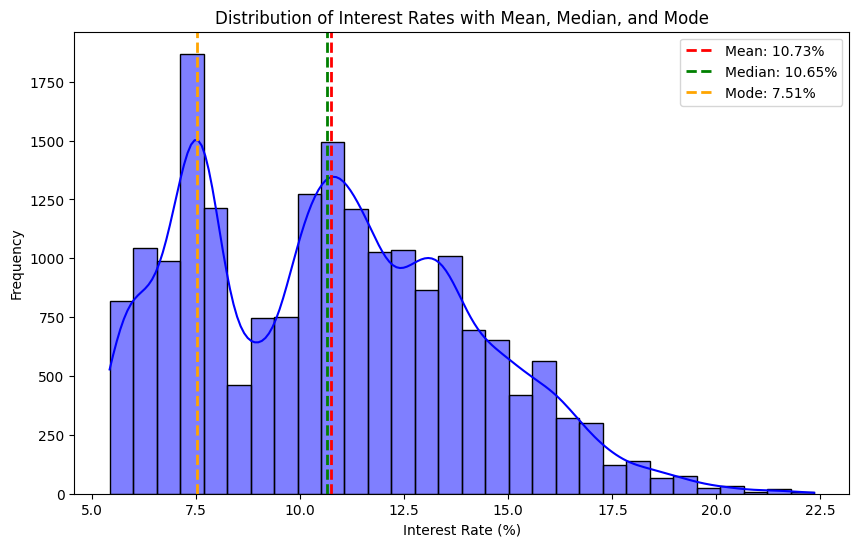

In [67]:

# Calculate mean, median, and mode for interest rate
mean_int_rate = loan_data_clean['int_rate'].mean()
median_int_rate = loan_data_clean['int_rate'].median()
mode_int_rate = loan_data_clean['int_rate'].mode()[0]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_clean['int_rate'], bins=30, kde=True, color='blue')

# Add mean, median, and mode lines
plt.axvline(mean_int_rate, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_int_rate:.2f}%')
plt.axvline(median_int_rate, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_int_rate:.2f}%')
plt.axvline(mode_int_rate, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_int_rate:.2f}%')

# Add titles and labels
plt.title('Distribution of Interest Rates with Mean, Median, and Mode')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [66]:
# Summary statistics for Interest Rate
int_rate_stats = loan_data_clean['int_rate'].describe()
print(int_rate_stats)

count    19264.000000
mean        10.729010
std          3.294674
min          5.420000
25%          7.740000
50%         10.650000
75%         13.110000
max         22.350000
Name: int_rate, dtype: float64


### 7.2.1 Key Observations:
- Count: There are 19,264 loans with valid interest rates in the dataset.
- Mean Interest Rate: The average interest rate is 10.73%.
- Median Interest Rate: The median interest rate is 10.65%, indicating that half of the loans have an interest rate below this value.
- Mode Interest Rate: The mode interest rate is 7.51%, indicating the most frequent interest rate.
- Minimum Interest Rate: The lowest interest rate is 5.42%.
- Maximum Interest Rate: The highest interest rate is 22.35%, which suggests that some high-risk borrowers are charged significantly more.
- Standard Deviation: The standard deviation is 3.29%, indicating moderate variability in the interest rates.

### 7.2.2 Skewness and Distribution:
- Interquartile Range (IQR):
  - 25th percentile: 7.74%.
  - 50th percentile (median): 10.65%.
  - 75th percentile: 13.11%.
- The distribution of interest rates is slightly right-skewed, meaning that while most loans have an interest rate around the median, there are a few loans with much higher interest rates that pull the mean upwards.
  

### 7.2.3 Analysis of Skewness:
- The mean and median are very close, suggesting that the interest rate distribution is close to symmetrical but with a slight right skew due to higher-risk borrowers.
  

### 7.2.3 Visual Insights (from the chart):
- Most loans have interest rates clustered between 4% and 13%, with fewer loans at both the low and high extremes.
- Loans with interest rates above 15% are relatively rare and likely reflect borrowers with higher risk.
  

##  7.3 Univariate Analysis - Annual Income (annual_inc)
  

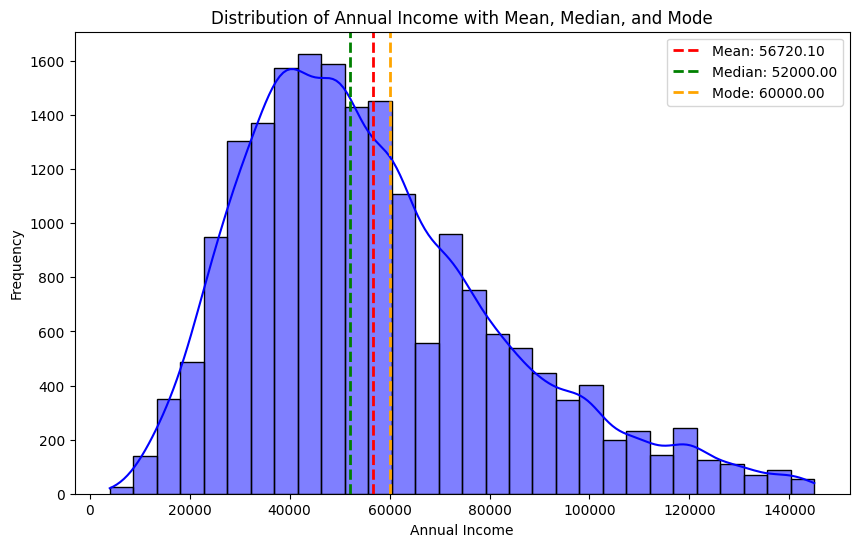

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean, median, and mode for annual income
mean_annual_inc = loan_data_clean['annual_inc'].mean()
median_annual_inc = loan_data_clean['annual_inc'].median()
mode_annual_inc = loan_data_clean['annual_inc'].mode()[0]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_clean['annual_inc'], bins=30, kde=True, color='blue')

# Add mean, median, and mode lines
plt.axvline(mean_annual_inc, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_annual_inc:.2f}')
plt.axvline(median_annual_inc, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_annual_inc:.2f}')
plt.axvline(mode_annual_inc, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_annual_inc:.2f}')

# Add titles and labels
plt.title('Distribution of Annual Income with Mean, Median, and Mode')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()




In [71]:
# Summary statistics for Annual Income
annual_inc_stats = loan_data_clean['annual_inc'].describe()
mean_annual_inc, median_annual_inc, mode_annual_inc, annual_inc_stats

(np.float64(56720.10278394933),
 np.float64(52000.0),
 np.float64(60000.0),
 count     19264.000000
 mean      56720.102784
 std       26285.550822
 min        4000.000000
 25%       37440.000000
 50%       52000.000000
 75%       71139.750000
 max      145000.000000
 Name: annual_inc, dtype: float64)

### 7.3.1 Summary Statistics:
- Count: 19,264 borrowers.
- Mean Annual Income: 56,720.10.
- Median Annual Income: 52,000.00.
- Mode Annual Income: 60,000.00 (most frequent income level).
- Standard Deviation: 26,285.55 (showing a wide spread in income).
- Minimum Annual Income: 4,000.00.
- Maximum Annual Income: $145,000.00.
- Percentiles:
   - 25th percentile: 37,440.00.
   - 50th percentile (Median): 52,000.00.
   - 75th percentile: 71,139.75.

### 7.3.2 Skewness and Visual Analysis:
- The mean income is higher than the median, indicating a right-skewed distribution. This is expected since a few higher-income borrowers are pulling the mean upward.
- The mode is slightly higher than the median, reflecting the most common income level in the dataset, which is around 60,000.

### 7.3.3 Distribution Analysis:
- The right-skewed distribution of annual income indicates that while most borrowers earn between 37,440 and 71,139, there are some high earners whose incomes stretch the distribution to the right, leading to a higher mean.
- The histogram clearly shows that the majority of borrowers earn between 40,000 and 60,000, with fewer borrowers in the higher-income range beyond 100,000.

## 7.4: Univariate Analysis - Debt-to-Income Ratio (`dti`)

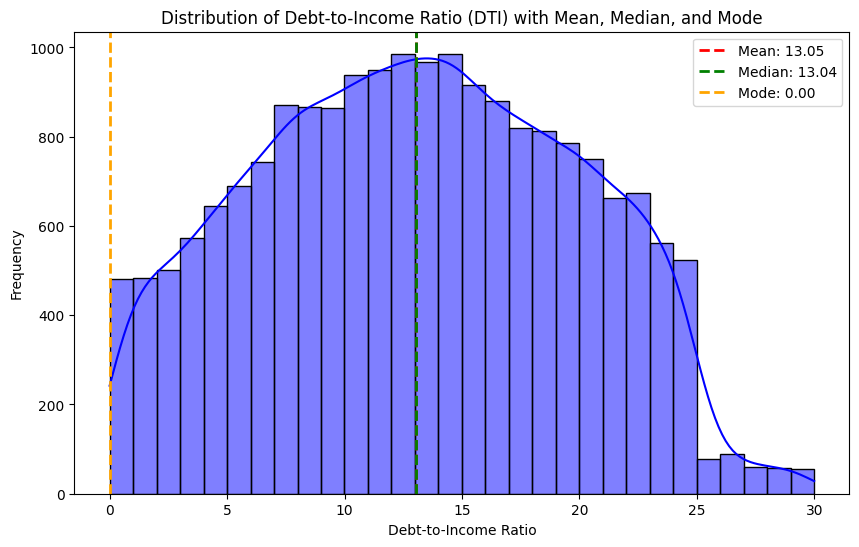

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean, median, and mode for dti
mean_dti = loan_data_clean['dti'].mean()
median_dti = loan_data_clean['dti'].median()
mode_dti = loan_data_clean['dti'].mode()[0]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_clean['dti'], bins=30, kde=True, color='blue')

# Add mean, median, and mode lines
plt.axvline(mean_dti, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_dti:.2f}')
plt.axvline(median_dti, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_dti:.2f}')
plt.axvline(mode_dti, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_dti:.2f}')

# Add titles and labels
plt.title('Distribution of Debt-to-Income Ratio (DTI) with Mean, Median, and Mode')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()
 

In [79]:
# Summary statistics for dti
dti_stats = loan_data_clean['dti'].describe()
mean_dti, median_dti, mode_dti, dti_stats

(np.float64(13.05452865448505),
 np.float64(13.045),
 np.float64(0.0),
 count    19264.000000
 mean        13.054529
 std          6.726819
 min          0.000000
 25%          7.800000
 50%         13.045000
 75%         18.300000
 max         29.990000
 Name: dti, dtype: float64)

### 7.4.1 Summary Statistics:
- Count: 19,264 borrowers.
- Mean Debt-to-Income Ratio: 13.05%.
- Median Debt-to-Income Ratio: 13.04%, very close to the mean, indicating a near-symmetrical distribution.
- Mode Debt-to-Income Ratio: 0% (this means that a non-trivial number of borrowers have no debt relative to their income, resulting in a DTI of 0).
- Standard Deviation: 6.73%, indicating moderate variability in DTI among borrowers.
- Minimum Debt-to-Income Ratio: 0%, reflecting borrowers who have no debt obligations.
- Maximum Debt-to-Income Ratio: 29.99%, indicating that some borrowers have close to 30% of their income committed to servicing debt.

### 7.4.2 Percentiles:
- 25th percentile: 7.8%.
- 50th percentile (Median): 13.04%.
- 75th percentile: 18.3%.

### 7.4.3 Analysis of Distribution:
- The mean and median DTI are very close, suggesting that the DTI distribution is nearly symmetrical around 13%.
- The presence of a mode of 0% indicates that a noticeable number of borrowers have no debt in relation to their income. This is likely because certain borrowers may not carry any additional debt aside from the loan they are applying for, leading to a DTI of zero.
- The distribution is slightly right-skewed, as indicated by the longer tail on the right side of the chart. Some borrowers have high DTIs approaching 30%, which may indicate higher financial stress due to debt obligations.


### 7.4.4 Visual Insights (from the chart):
- The histogram shows that most borrowers have a DTI between 7.8% and 18.3%, with the peak around the mean and median of 13%.
- The long right tail suggests that a smaller proportion of borrowers have higher DTI ratios, which could signal a riskier financial profile.
- Borrowers with a DTI above 20% may face more financial difficulty repaying loans, making them more susceptible to default.


### 7.4.5 Skewness:
- The slight right-skewness is typical for financial ratios like DTI, where most borrowers have manageable debt levels, but a minority of borrowers have significantly higher levels of debt relative to their income.

# WIP

In [45]:
import pandas as pd

In [46]:
# Load the dataset
file_path = './loan.csv'
loan_data = pd.read_csv(file_path)

In [47]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Here are some of the key columns that appear in the data:
- id: Unique identifier for each loan.
- member_id: Unique identifier for the borrower.
- loan_amnt: The loan amount requested by the borrower.
- funded_amnt: The actual loan amount funded by the lender.
- term: The loan term (e.g., 36 months, 60 months).
- int_rate: The interest rate on the loan.
- installment: The monthly payment amount.
- grade: Credit grade assigned to the loan (e.g., A, B, C).
- sub_grade: More detailed credit grade (e.g., B2, C5).
- num_tl_90g_dpd_24m: The number of trade lines with a 90+ days delinquency in the past 24 months.
- pub_rec_bankruptcies: Number of public record bankruptcies.

In [48]:
data_dict_path = 'Data_Dictionary.xlsx'
data_dictionary = pd.read_excel(data_dict_path)

In [49]:
data_dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
